In [31]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import itertools
import numpy as np

# Enable inline plotting
%matplotlib inline

We have a large 4970 x 4970 covariance matrix containing all the ftr payoffs for 71 nodes. What we want to do is to take that large matrix and then create smaller covariance matricies that contain certain nodes of interest, depending on our bag of nomination nodes

In [2]:
covmat = read_csv('billy_cov_mat.csv', index_col=0)

In [259]:
covmat.shape

(4970, 4970)

In [258]:
covmat.head(10)

,ARA_ALB,ASB_ALB,ATI_ALB,AVI_ALB,BEN_ALB,BPE_ALB,BRB_ALB,BRK_ALB,BRY_ALB,CML_ALB,...,TWI_WTU,TWZ_WTU,WHI_WTU,WIL_WTU,WKM_WTU,WPA_WTU,WPR_WTU,WRD_WTU,WRK_WTU,WTK_WTU
ARA_ALB,11.459769,16.093398,9.092072,16.689198,16.691793,5.935830,0.006241,5.721717,16.278319,16.668278,...,8.506365,8.445518,0.115152,-0.071658,-0.155999,-0.302557,11.283328,-0.022358,0.307040,8.413165
ASB_ALB,16.093398,94.719267,14.197811,93.164292,93.149319,20.003685,0.011999,15.608266,94.673427,94.752758,...,76.115042,73.709055,-0.356585,7.740932,-2.364237,-3.828254,94.571466,-0.169795,-1.214918,73.438089
ATI_ALB,9.092072,14.197811,8.808676,14.624290,14.637123,5.309885,0.001002,4.828594,14.361330,14.598896,...,6.952615,6.824448,0.094500,-0.385375,-0.119069,-0.194480,9.605385,0.033529,0.257959,6.777852
AVI_ALB,16.689198,93.164292,14.624290,93.993339,93.927826,21.052803,0.010203,17.051116,93.953666,95.575508,...,75.940478,73.810478,-0.326216,8.156300,-2.219644,-3.532354,92.920642,-0.166192,-1.014805,73.658791
BEN_ALB,16.691793,93.149319,14.637123,93.927826,93.872166,20.949192,0.010304,16.928136,93.942325,95.531450,...,75.936763,73.764632,-0.328259,8.060466,-2.245239,-3.559984,92.985598,-0.176728,-1.030551,73.595308
BPE_ALB,5.935830,20.003685,5.309885,21.052803,20.949192,11.388447,0.004780,10.518024,20.041104,21.426105,...,14.221562,14.040426,-0.099562,6.345204,-0.457801,-0.947770,10.747768,0.038069,-0.114178,14.149736
BRB_ALB,0.006241,0.011999,0.001002,0.010203,0.010304,0.004780,0.000774,0.002953,0.013457,0.010884,...,0.003797,0.002089,-0.000413,-0.001785,-0.001274,-0.002260,0.005262,-0.000023,-0.001681,0.002083
BRK_ALB,5.721717,15.608266,4.828594,17.051116,16.928136,10.518024,0.002953,13.647699,15.568260,17.215911,...,10.902893,11.071082,0.011106,5.994101,0.288926,0.037437,8.379182,-0.011174,0.316931,11.268019
BRY_ALB,16.278319,94.673427,14.361330,93.953666,93.942325,20.041104,0.013457,15.568260,95.692064,95.583388,...,76.854565,74.366403,-0.391398,7.724804,-2.564007,-4.024068,95.129026,-0.191224,-1.310507,74.079382
CML_ALB,16.668278,94.752758,14.598896,95.575508,95.531450,21.426105,0.010884,17.215911,95.583388,97.744744,...,78.043829,75.112307,-0.356365,8.408198,-2.511077,-3.936748,93.753272,-0.201580,-1.137365,74.861146


The list of nodes we're looking at

In [445]:
node_list = read_csv('R/subset_nodes.csv', header=None, names=['Node'])
node_list = node_list['Node']
current_nodes = ["OTA", "BEN", "HAY", "ISL", "INV", "MDN", "STK", "WKM"]
node_list

0     ASB
1     BPE
2     CML
3     CYD
4     EDG
5     HAM
6     HLY
7     HWB
8     KAW
9     KMO
10    LTN
11    MAN
12    NPL
13    NSY
14    OHA
15    RDF
16    ROX
17    SDN
18    SFD
19    TIM
20    TKU
21    TWC
22    TWH
23    WHI
24    WPR
25    WRK
26    WTU
Name: Node, dtype: object

What we are going to do is take the list of 32 nomination nodes, and find all possible combinations of [4,3,2,1], and then add those combinations to our current 5 nodes. 

In [60]:
node_4_combos = itertools.combinations(node_list, 4)
node_3_combos = itertools.combinations(node_list, 3)
node_2_combos = itertools.combinations(node_list, 2)
# for single combo, will just be the node list
# total_combos = node_combos + current_nodes

In [61]:
# let's look at a sample of the 
x = list(itertools.islice(node_4_combos, 5))
x[0]

('ASB', 'BPE', 'BRB', 'CML')

In [62]:
# working out an example for a single 4 node combo
# expect 1 list of ftr_paths, and 1 mean of the diagonal
test_ftr_paths_4 = itertools.permutations(current_nodes + list(x[0]), 2)
# for test_path_tuple in test_ftr_paths_4:
    # subsetting the large covariance matrix by selecting the paths 
test_ftr_path_list = []
for test_path_tuple in test_ftr_paths_4:
    test_ftr_path = test_path_tuple[0] + '_' + test_path_tuple[1]
    test_ftr_path_list.append(test_ftr_path)
# select the path from the covariance matrix"
smaller_covmat = covmat.loc[test_ftr_path_list]
smaller_covmat = smaller_covmat[test_ftr_path_list]
smaller_covmat

,OTA_BEN,OTA_HAY,OTA_ISL,OTA_INV,OTA_ASB,OTA_BPE,OTA_BRB,OTA_CML,BEN_OTA,BEN_HAY,...,BRB_BPE,BRB_CML,CML_OTA,CML_BEN,CML_HAY,CML_ISL,CML_INV,CML_ASB,CML_BPE,CML_BRB
OTA_BEN,149.926848,58.175216,190.475661,191.177394,177.328854,33.432655,8.975167,163.169179,-30.758065,-18.400151,...,22.184577,150.769037,-32.562348,-1.617175,-20.311075,21.027359,26.933566,10.717819,-21.919452,-35.987322
OTA_HAY,58.175216,26.921965,76.809703,76.025046,70.607867,15.691851,4.553663,63.931244,-13.256081,-7.123510,...,10.491766,58.205307,-14.089867,-0.691067,-8.026723,10.262721,11.723666,5.315581,-8.888524,-15.262140
OTA_ISL,190.475661,76.809703,247.071695,247.528843,228.655221,44.171883,13.016706,208.683156,-44.464767,-26.573048,...,28.961580,191.699408,-47.183492,-2.256581,-29.501162,30.414086,37.845842,15.852234,-32.104351,-51.150534
OTA_INV,191.177394,76.025046,247.528843,254.141897,229.321586,44.117397,12.898493,210.997904,-44.437884,-26.431388,...,28.940682,193.922605,-47.678564,-2.533863,-30.005024,28.156602,42.437366,14.007353,-32.466045,-51.855371
OTA_ASB,177.328854,70.607867,228.655221,229.321586,212.121446,40.614405,11.660697,193.972520,-39.709920,-23.720199,...,26.711856,178.509209,-42.118059,-2.031328,-26.299457,27.313845,34.333140,14.258416,-28.554916,-45.920673
OTA_BPE,33.432655,15.691851,44.171883,44.117397,40.614405,9.348176,2.634675,36.888979,-6.958781,-3.386526,...,6.329883,33.611028,-7.426241,-0.385680,-3.903196,5.841634,7.030018,2.993442,-4.369856,-8.069518
OTA_BRB,8.975167,4.553663,13.016706,12.898493,11.660697,2.634675,1.595729,10.116348,-1.944862,-0.982270,...,1.620093,8.921263,-2.149188,-0.045968,-1.209610,3.002009,2.998817,1.802001,-1.528383,-1.748545
OTA_CML,163.169179,63.931244,208.683156,210.997904,193.972520,36.888979,10.116348,178.553499,-34.662898,-20.643305,...,24.407054,164.724371,-36.838137,-1.882512,-22.992691,23.207423,31.404448,11.719620,-24.830798,-40.550916
BEN_OTA,-30.758065,-13.256081,-44.464767,-44.437884,-39.709920,-6.958781,-1.944862,-34.662898,91.952512,69.838114,...,-4.117127,-30.519648,93.594639,1.165269,71.520537,-7.790156,-10.030815,-4.008534,73.820410,95.793027
BEN_HAY,-18.400151,-7.123510,-26.573048,-26.431388,-23.720199,-3.386526,-0.982270,-20.643305,69.838114,61.679560,...,-1.841701,-18.170322,70.606300,0.466104,62.421711,-5.647133,-6.103682,-3.111405,63.287725,72.097013


In [446]:
# reference_4_combo_list = []
node_4_combos = itertools.combinations(node_list, 4)
combo_4_df = DataFrame(columns = ['Nodes', 'Mean Diag', 'Mean UpperT'])
for combo_of_4 in node_4_combos:
    # reference_combo_list.append(combo_of_4)
    total_nodes = current_nodes + list(combo_of_4)
    total_path_4 = itertools.permutations(total_nodes, 2)
    ftr_path_list = []
    for path_tuple in total_path_4:
        ftr_path = path_tuple[0] + '_' + path_tuple[1]
        ftr_path_list.append(ftr_path)
    # selecting out the smaller covariance matrices
    smaller_covmat = covmat.loc[ftr_path_list]
    smaller_covmat = smaller_covmat[ftr_path_list]
    diag_mean =  np.mean(np.diag(smaller_covmat))
    upper_tri_mean = np.mean(smaller_covmat.as_matrix()[np.triu_indices(len(smaller_covmat), 1)])
    combo_4_df = combo_4_df.append({'Nodes': combo_of_4,
                       'Mean Diag': diag_mean,
                       'Mean UpperT': upper_tri_mean}, ignore_index = True)

In [447]:
node_3_combos = itertools.combinations(node_list, 3)
combo_3_df = DataFrame(columns = ['Nodes', 'Mean Diag', 'Mean UpperT'])
for combo_of_3 in node_3_combos:
    total_nodes = current_nodes + list(combo_of_3)
    total_path_3 = itertools.permutations(total_nodes, 2)
    ftr_path_list = []
    for path_tuple in total_path_3:
        ftr_path = path_tuple[0] + '_' + path_tuple[1]
        ftr_path_list.append(ftr_path)
    # selecting out the smaller covariance matrices
    smaller_covmat = covmat.loc[ftr_path_list]
    smaller_covmat = smaller_covmat[ftr_path_list]
    diag_mean =  np.mean(np.diag(smaller_covmat))
    upper_tri_mean = np.mean(smaller_covmat.as_matrix()[np.triu_indices(len(smaller_covmat)), 1])
    combo_3_df = combo_3_df.append({'Nodes': combo_of_3,
                       'Mean Diag': diag_mean,
                       'Mean UpperT': upper_tri_mean}, ignore_index = True)

In [448]:
node_2_combos = itertools.combinations(node_list, 2)
combo_2_df = DataFrame(columns = ['Nodes', 'Mean Diag', 'Mean UpperT'])
for combo_of_2 in node_2_combos:
    # reference_combo_list.append(combo_of_4)
    total_nodes = current_nodes + list(combo_of_2)
    total_path_2 = itertools.permutations(total_nodes, 2)
    ftr_path_list = []
    for path_tuple in total_path_2:
        ftr_path = path_tuple[0] + '_' + path_tuple[1]
        ftr_path_list.append(ftr_path)
    # selecting out the smaller covariance matrices
    smaller_covmat = covmat.loc[ftr_path_list]
    smaller_covmat = smaller_covmat[ftr_path_list]
    diag_mean =  np.mean(np.diag(smaller_covmat))
    upper_tri_mean = np.mean(smaller_covmat.as_matrix()[np.triu_indices(len(smaller_covmat))])
    combo_2_df = combo_2_df.append({'Nodes': combo_of_2,
                       'Mean Diag': diag_mean,
                       'Mean UpperT': upper_tri_mean}, ignore_index = True)

In [449]:
node_1_combos = itertools.combinations(node_list, 1)
combo_1_df = DataFrame(columns = ['Nodes', 'Mean Diag', 'Mean UpperT'])
for combo_of_1 in node_1_combos:
    # reference_combo_list.append(combo_of_4)
    total_nodes = current_nodes + list(combo_of_1)
    total_path_1 = itertools.permutations(total_nodes, 2)
    ftr_path_list = []
    for path_tuple in total_path_1:
        ftr_path = path_tuple[0] + '_' + path_tuple[1]
        ftr_path_list.append(ftr_path)
    # selecting out the smaller covariance matrices
    smaller_covmat = covmat.loc[ftr_path_list]
    smaller_covmat = smaller_covmat[ftr_path_list]
    diag_mean =  np.mean(np.diag(smaller_covmat))
    upper_tri_mean = np.mean(smaller_covmat.as_matrix()[np.triu_indices(len(smaller_covmat), 1)])
    combo_1_df = combo_1_df.append({'Nodes': combo_of_1,
                       'Mean Diag': diag_mean,
                       'Mean UpperT': upper_tri_mean}, ignore_index = True)

In [417]:
combo4_smallest_covar_df = combo_4_df.sort_values(by='Mean UpperT').head(100)

In [450]:
combo_4_df.sort_values(by='Mean UpperT')

,Nodes,Mean Diag,Mean UpperT
5076,"(CML, CYD, OHA, ROX)",66.639381,13.505373
5062,"(CML, CYD, NSY, OHA)",66.462341,13.552443
5064,"(CML, CYD, NSY, ROX)",67.463303,13.628160
5079,"(CML, CYD, OHA, TIM)",66.726453,13.649997
4969,"(CML, CYD, HWB, OHA)",67.155995,13.679145
6561,"(CML, NSY, OHA, ROX)",66.992533,13.687222
8332,"(CYD, NSY, OHA, ROX)",67.053908,13.688032
4971,"(CML, CYD, HWB, ROX)",68.110195,13.723992
5077,"(CML, CYD, OHA, SDN)",67.264839,13.725932
5100,"(CML, CYD, ROX, TIM)",67.739941,13.736457


In [451]:
combo_4_df.sort_values(by='Mean Diag', ascending=False).head(10)

,Nodes,Mean Diag,Mean UpperT
12241,"(HLY, MAN, TWH, WPR)",101.298852,24.029550
10416,"(HAM, HLY, TWH, WPR)",100.767131,23.827057
11880,"(HLY, KAW, TWH, WPR)",100.524005,23.922382
11101,"(HAM, MAN, TWH, WPR)",100.477735,23.759651
12612,"(HLY, SDN, TWH, WPR)",100.414436,24.011175
9086,"(EDG, HLY, TWH, WPR)",100.295877,23.587895
11727,"(HLY, HWB, TWH, WPR)",100.244032,23.944264
14026,"(KAW, MAN, TWH, WPR)",100.115353,23.779274
12698,"(HLY, TWH, WPR, WRK)",100.036722,23.799981
1451,"(ASB, HLY, TWH, WPR)",99.810750,24.117784


In [421]:
combo_3_df.sort_values(by='Mean UpperT')

,Nodes,Mean Diag,Mean UpperT
1318,"(CML, CYD, OHA)",50.398996,11.990708
1320,"(CML, CYD, ROX)",51.438217,12.066554
1317,"(CML, CYD, NSY)",51.264584,12.124725
1312,"(CML, CYD, KMO)",69.522859,12.135171
1830,"(CYD, KMO, OHA)",68.892110,12.151440
1479,"(CML, KMO, OHA)",68.776853,12.161061
1931,"(CYD, OHA, ROX)",51.092543,12.161934
1580,"(CML, OHA, ROX)",51.022753,12.166682
1915,"(CYD, NSY, OHA)",50.893785,12.226192
1564,"(CML, NSY, OHA)",50.815234,12.235314


In [452]:
combo_3_df.sort_values(by='Mean Diag', ascending=False).head(10)

,Nodes,Mean Diag,Mean UpperT
1776,"(HLY, TWH, WPR)",102.881793,21.890640
1586,"(HAM, TWH, WPR)",102.036977,21.664882
2100,"(KAW, TWH, WPR)",101.628895,21.861791
1376,"(EDG, TWH, WPR)",101.252112,21.523353
2918,"(TWH, WPR, WRK)",101.083070,21.772027
2915,"(TWH, WHI, WPR)",100.761853,21.694376
2751,"(RDF, TWH, WPR)",100.697713,21.678584
2919,"(TWH, WPR, WTU)",100.539275,21.641040
2906,"(TWC, TWH, WPR)",100.237237,22.225160
2896,"(TKU, TWH, WPR)",100.231808,21.655792


In [453]:
combo_2_df.sort_values(by='Mean UpperT')

,Nodes,Mean Diag,Mean UpperT
62,"(CML, OHA)",74.858098,17.783502
85,"(CYD, OHA)",74.949663,17.787622
51,"(CML, CYD)",75.625777,17.820416
274,"(OHA, ROX)",75.711013,17.973291
87,"(CYD, ROX)",76.445901,18.000785
64,"(CML, ROX)",76.363572,18.004901
260,"(NSY, OHA)",75.452677,18.052712
84,"(CYD, NSY)",76.208649,18.080101
61,"(CML, NSY)",76.120869,18.080866
277,"(OHA, TIM)",75.794518,18.170792


In [454]:
combo_2_df.sort_values(by='Mean Diag', ascending=False).head(10)

,Nodes,Mean Diag,Mean UpperT
342,"(TWH, WPR)",102.674170,26.740629
158,"(HLY, WPR)",96.060389,25.333554
241,"(MAN, TWH)",95.788511,23.581136
138,"(HAM, WPR)",95.014696,24.950572
310,"(SDN, TWH)",94.770727,23.551396
175,"(HWB, TWH)",94.562378,23.473126
195,"(KAW, WPR)",94.371380,24.952879
156,"(HLY, TWH)",94.159106,22.961675
21,"(ASB, TWH)",94.071933,23.670236
117,"(EDG, WPR)",93.914179,24.387677


In [455]:
combo_1_df.sort_values(by='Mean Diag', ascending=False).head(10)

,Nodes,Mean Diag,Mean UpperT
22,"(TWH,)",96.391191,22.475729
24,"(WPR,)",91.687431,22.400706
6,"(HLY,)",87.945107,20.351894
5,"(HAM,)",86.936934,19.997212
8,"(KAW,)",86.861867,20.356478
9,"(KMO,)",86.835016,18.299800
21,"(TWC,)",86.639481,21.491833
4,"(EDG,)",86.319234,19.490317
25,"(WRK,)",85.782682,19.879071
23,"(WHI,)",85.391309,19.756349


In [456]:
combo_1_df.sort_values(by='Mean UpperT')

,Nodes,Mean Diag,Mean UpperT
14,"(OHA,)",79.882491,18.241018
9,"(KMO,)",86.835016,18.299800
3,"(CYD,)",80.862539,18.330310
2,"(CML,)",80.755253,18.335628
16,"(ROX,)",81.765630,18.498207
13,"(NSY,)",81.466485,18.618721
7,"(HWB,)",82.604529,18.718064
10,"(LTN,)",80.182843,18.718455
19,"(TIM,)",81.881123,18.758605
1,"(BPE,)",80.542062,18.771647


In [294]:
combo_4_df.describe()

,Mean Diag,Mean UpperT
count,35960.000000,35960.000000
mean,77.742809,17.565554
std,8.210272,2.593060
min,45.714852,7.635920
25%,73.317213,16.150916
50%,77.722161,17.575718
75%,82.474706,19.075283
max,105.874066,25.869580


In [296]:
combo_2_df.describe()

,Mean Diag,Mean UpperT
count,496.000000,496.000000
mean,77.070820,20.213764
std,8.835621,3.091581
min,56.616480,13.000986
25%,73.948115,19.323438
50%,77.888597,20.536706
75%,82.088281,21.909048
max,103.170096,28.532513


In [297]:
combo_1_df.describe()

,Mean Diag,Mean UpperT
count,32.000000,32.000000
mean,76.660356,17.244052
std,8.398533,2.811882
min,64.592619,13.365715
25%,67.704127,14.038851
50%,80.393497,17.946542
75%,82.540874,19.286518
max,99.837620,23.743373


Take the top 100 smallest `Mean Upper T` node combos, and then find the unique nodes from that. Then find the paths between all those nodes, and then calculate covariance matrix of those payoff paths. 

In [424]:
a = combo4_smallest_covar_df['Nodes'].tolist()
unique_nodes_4combo = set(i for sub in a for i in sub)

In [425]:
total_nodes = current_nodes + list(unique_nodes_4combo)
total_path = itertools.permutations(total_nodes, 2)

ftr_path_list = []
for path_tuple in total_path:
    ftr_path = path_tuple[0] + '_' + path_tuple[1]
    ftr_path_list.append(ftr_path)

smaller_covmat = covmat.loc[ftr_path_list]
smaller_covmat = smaller_covmat[ftr_path_list]
smaller_covmat.head(5)

,OTA_BEN,OTA_HAY,OTA_ISL,OTA_INV,OTA_NSY,OTA_TIM,OTA_CYD,OTA_SDN,OTA_ASB,OTA_OHA,...,MAN_INV,MAN_NSY,MAN_TIM,MAN_CYD,MAN_SDN,MAN_ASB,MAN_OHA,MAN_ROX,MAN_HWB,MAN_CML
OTA_BEN,149.926848,58.175216,190.475661,191.177394,170.829695,175.936289,163.133603,179.175948,177.328854,154.309446,...,7.719556,1.657039,3.844804,0.716963,2.653287,5.090383,-1.246167,1.450588,2.312830,0.483750
OTA_HAY,58.175216,26.921965,76.809703,76.025046,67.216329,69.729106,63.891609,70.959448,70.607867,60.152023,...,3.760942,0.945193,2.222233,0.456403,1.484527,2.996869,-0.379586,0.825309,1.307580,0.380607
OTA_ISL,190.475661,76.809703,247.071695,247.528843,219.262488,226.512111,208.721566,230.827844,228.655221,196.546235,...,11.021078,2.376763,5.762869,0.979059,3.796766,7.800255,-1.758270,2.057958,3.317774,0.631252
OTA_INV,191.177394,76.025046,247.528843,254.141897,222.191145,227.660471,211.360423,235.354546,229.321586,197.457594,...,9.727478,0.406554,1.890438,-0.441581,1.823867,3.489377,-3.739855,0.577436,1.450903,-1.040917
OTA_NSY,170.829695,67.216329,219.262488,222.191145,196.943385,202.103556,187.419233,207.190257,203.644394,176.192688,...,8.786205,1.553945,3.456256,0.360280,2.510108,4.863454,-2.122244,1.230829,2.142668,0.013231


In [249]:
monthly_payoffs = pd.read_csv('billy_month_payoff.csv', index_col=0)

In [250]:
cols = monthly_payoffs.columns
a = [b[:3] + b[7:11] for b in cols]
monthly_payoffs.columns = a

In [426]:
combo4_covmat = monthly_payoffs[ftr_path_list].cov()

In [427]:
combo4_covmat

,OTA_BEN,OTA_HAY,OTA_ISL,OTA_INV,OTA_NSY,OTA_TIM,OTA_CYD,OTA_SDN,OTA_ASB,OTA_OHA,...,MAN_INV,MAN_NSY,MAN_TIM,MAN_CYD,MAN_SDN,MAN_ASB,MAN_OHA,MAN_ROX,MAN_HWB,MAN_CML
OTA_BEN,149.926848,58.175216,190.475661,191.177394,170.829695,175.936289,163.133603,179.175948,177.328854,154.309446,...,7.719556,1.657039,3.844804,0.716963,2.653287,5.090383,-1.246167,1.450588,2.312830,0.483750
OTA_HAY,58.175216,26.921965,76.809703,76.025046,67.216329,69.729106,63.891609,70.959448,70.607867,60.152023,...,3.760942,0.945193,2.222233,0.456403,1.484527,2.996869,-0.379586,0.825309,1.307580,0.380607
OTA_ISL,190.475661,76.809703,247.071695,247.528843,219.262488,226.512111,208.721566,230.827844,228.655221,196.546235,...,11.021078,2.376763,5.762869,0.979059,3.796766,7.800255,-1.758270,2.057958,3.317774,0.631252
OTA_INV,191.177394,76.025046,247.528843,254.141897,222.191145,227.660471,211.360423,235.354546,229.321586,197.457594,...,9.727478,0.406554,1.890438,-0.441581,1.823867,3.489377,-3.739855,0.577436,1.450903,-1.040917
OTA_NSY,170.829695,67.216329,219.262488,222.191145,196.943385,202.103556,187.419233,207.190257,203.644394,176.192688,...,8.786205,1.553945,3.456256,0.360280,2.510108,4.863454,-2.122244,1.230829,2.142668,0.013231
OTA_TIM,175.936289,69.729106,226.512111,227.660471,202.103556,208.551232,192.511979,212.525250,210.202580,181.409171,...,9.680696,2.005533,4.839941,0.770344,3.237155,6.415935,-1.734531,1.713231,2.819209,0.444667
OTA_CYD,163.133603,63.891609,208.721566,211.360423,187.419233,192.511979,178.770385,197.215912,193.992507,168.178485,...,8.262029,1.250822,3.084548,0.318223,2.322018,4.439466,-2.102136,1.135121,1.975168,-0.066047
OTA_SDN,179.175948,70.959448,230.827844,235.354546,207.190257,212.525250,197.215912,218.803794,214.121435,184.897239,...,9.197352,0.942837,2.730733,0.012432,2.234513,4.221298,-2.867448,0.950166,1.863977,-0.476561
OTA_ASB,177.328854,70.607867,228.655221,229.321586,203.644394,210.202580,193.992507,214.121435,212.121446,182.856592,...,9.901649,2.192495,5.185222,0.893446,3.406631,6.939731,-1.570472,1.847908,2.976804,0.586653
OTA_OHA,154.309446,60.152023,196.546235,197.457594,176.192688,181.409171,168.178485,184.897239,182.856592,158.917731,...,7.997908,1.687889,3.893793,0.690978,2.693783,5.192458,-1.360641,1.457590,2.342978,0.440473


In [260]:
covmat['OTA_HAY'].loc['OTA_HAY']

26.921964671509524

In [428]:
monthly_payoffs[['OTA_BEN', 'OTA_HAY']].cov()

,OTA_BEN,OTA_HAY
OTA_BEN,149.926848,58.175216
OTA_HAY,58.175216,26.921965


In [429]:
monthly_payoffs[['OTA_BEN','MAN_ROX', 'OTA_HAY']].cov()

,OTA_BEN,MAN_ROX,OTA_HAY
OTA_BEN,149.926848,1.450588,58.175216
MAN_ROX,1.450588,0.884036,0.825309
OTA_HAY,58.175216,0.825309,26.921965


In [272]:
df = pd.read_csv('R/spot_for_billy.csv')

In [278]:
df = df.replace(-100000, np.nan)
df = df.replace(100000, np.nan)
df = df.pivot_table(index = ['node', 'nzdate'], columns = 'tp', values = 'price')

In [279]:
list_of_71_nodes = list(df.index.get_level_values('node').unique())

In [284]:
covmat = monthly_payoffs.cov()

In [431]:
covmat[['OTA_BEN','MAN_ROX', 'OTA_HAY']].loc[['OTA_BEN','MAN_ROX', 'OTA_HAY']]

,OTA_BEN,MAN_ROX,OTA_HAY
OTA_BEN,149.926848,1.450588,58.175216
MAN_ROX,1.450588,0.884036,0.825309
OTA_HAY,58.175216,0.825309,26.921965


Let's look at CML, CYD, OHA, ROX and the paths they form

In [435]:
paths = itertools.permutations(['CML', 'CYD', 'OHA', 'ROX'], 2)
ftr_path_list = []
for path_tuple in paths:
    ftr_path = path_tuple[0] + '_' + path_tuple[1]
    ftr_path_list.append(ftr_path)

In [436]:
combo4_weird = monthly_payoffs[ftr_path_list]

In [437]:
combo4_weird.index = pd.to_datetime(combo4_weird.index)

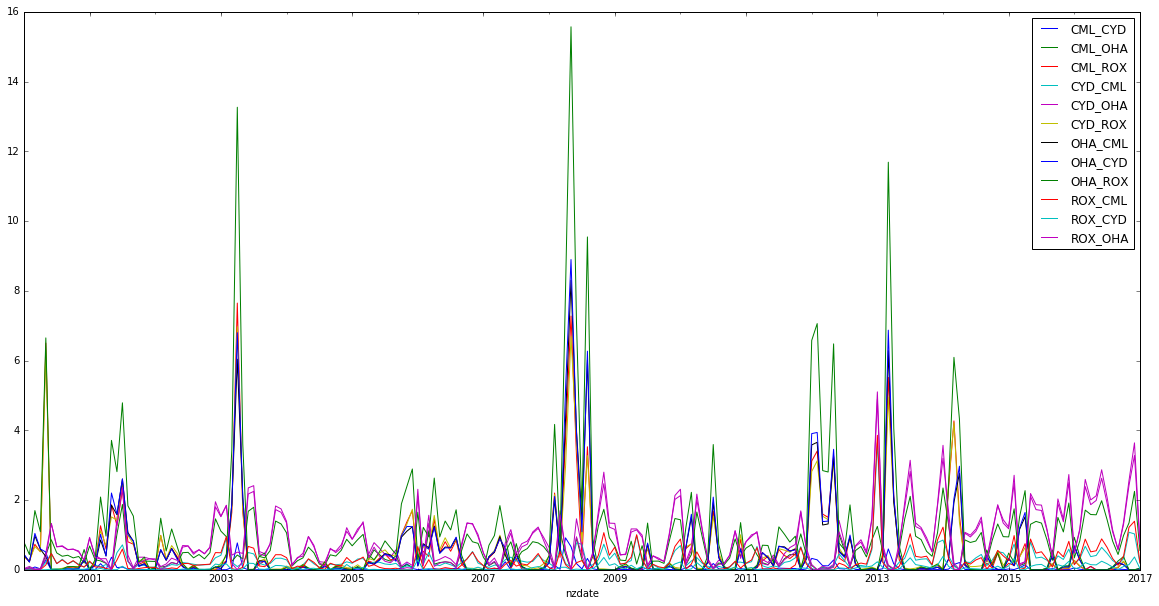

In [438]:
f = plt.figure(figsize=(20, 10))
combo4_weird.plot(ax=f.gca())
# combo4_weird.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));
f.savefig('combo4.png', dpi=100)


In [439]:
combo4_weird.head(5)

,CML_CYD,CML_OHA,CML_ROX,CYD_CML,CYD_OHA,CYD_ROX,OHA_CML,OHA_CYD,OHA_ROX,ROX_CML,ROX_CYD,ROX_OHA
nzdate,,,,,,,,,,,,
2000-01-31,0.027816,0.021082,0.375309,0.018797,0.033091,0.362776,0.429429,0.450457,0.794241,0.004429,0.000914,0.015013
2000-02-29,0.009562,0.060963,0.239440,0.043894,0.096236,0.265302,0.222723,0.223664,0.437091,0.008477,0.000007,0.044368
2000-03-31,0.080613,0.010323,0.730307,0.017971,0.018185,0.666495,0.972346,1.042851,1.698291,0.001169,0.000000,0.007130
2000-04-30,0.028236,0.017083,0.516493,0.034160,0.032701,0.520264,0.588750,0.598444,1.091771,0.002153,0.000000,0.005764
2000-05-31,0.276512,0.426136,6.499980,0.210108,0.487023,6.295874,0.381640,0.508931,6.649422,0.138925,0.001223,0.332863


In [345]:
spot_prices = pd.read_csv('R/spot_for_billy.csv')

In [354]:
spot_prices['nzdate']=pd.to_datetime(spot_prices['nzdate'],format='%Y-%m-%d')

In [363]:
spot_prices.head(5)

,node,nzdate,tp,price
0,ALB1101,2000-01-01,1,0.34
1,ALB1101,2000-01-01,2,0.31
2,ALB1101,2000-01-01,3,0.31
3,ALB1101,2000-01-01,4,10.11
4,ALB1101,2000-01-01,5,10.15


In [441]:
monthly_payoffs['OTA_BRB']

nzdate
2000-01-31    0.650101
2000-02-29    0.724188
2000-03-31    1.028622
2000-04-30    1.133514
2000-05-31    1.347849
2000-06-30    1.606778
2000-07-31    1.162325
2000-08-31    1.559570
2000-09-30    1.564764
2000-10-31    1.560792
2000-11-30    1.709201
2000-12-31    1.188972
2001-01-31    1.463622
2001-02-28    1.420045
2001-03-31    1.561831
2001-04-30    2.387882
2001-05-31    2.434872
2001-06-30    5.492424
2001-07-31    8.090706
2001-08-31    3.351438
2001-09-30    1.746576
2001-10-31    1.430197
2001-11-30    1.342437
2001-12-31    0.564718
2002-01-31    1.116976
2002-02-28    1.131161
2002-03-31    1.371817
2002-04-30    2.206757
2002-05-31    1.896720
2002-06-30    1.512632
                ...   
2014-08-31    2.175323
2014-09-30    1.424444
2014-10-31    1.493320
2014-11-30    1.545250
2014-12-31    2.040773
2015-01-31    2.206196
2015-02-28    2.430528
2015-03-31    2.676794
2015-04-30    2.441357
2015-05-31    1.481250
2015-06-30    1.689785
2015-07-31    1.631102
2015

In [381]:
spot_prices[(spot_prices['node'] == 'MDN2201')]

,node,nzdate,tp,price
7587349,MDN2201,2000-05-01,1,34.82
7587350,MDN2201,2000-05-01,2,28.89
7587351,MDN2201,2000-05-01,3,31.78
7587352,MDN2201,2000-05-01,4,28.43
7587353,MDN2201,2000-05-01,5,22.89
7587354,MDN2201,2000-05-01,6,22.82
7587355,MDN2201,2000-05-01,7,18.04
7587356,MDN2201,2000-05-01,8,17.99
7587357,MDN2201,2000-05-01,9,18.09
7587358,MDN2201,2000-05-01,10,18.43


In [382]:
spot_prices[spot_prices['node'] == 'OTA2201']

,node,nzdate,tp,price
10684547,OTA2201,2000-01-01,1,0.34
10684548,OTA2201,2000-01-01,2,0.31
10684549,OTA2201,2000-01-01,3,0.31
10684550,OTA2201,2000-01-01,4,10.01
10684551,OTA2201,2000-01-01,5,10.06
10684552,OTA2201,2000-01-01,6,10.02
10684553,OTA2201,2000-01-01,7,9.83
10684554,OTA2201,2000-01-01,8,9.83
10684555,OTA2201,2000-01-01,9,9.86
10684556,OTA2201,2000-01-01,10,9.86


In [395]:
wrong_ftr_paths = monthly_payoffs.columns
wrong_path = wrong_ftr_paths[0]

In [399]:
wrong_path[4:] + '_' + wrong_path[:3]

'ARA_ALB'

In [403]:
fixed_paths = [wrong_path[4:] + '_' + wrong_path[:3] for wrong_path in wrong_ftr_paths]

In [404]:
monthly_payoffs.columns = fixed_paths

In [406]:
monthly_payoffs['ISL_BEN']

nzdate
2000-01-31    0.000000
2000-02-29    0.000000
2000-03-31    0.000000
2000-04-30    0.000000
2000-05-31    0.000000
2000-06-30    0.000000
2000-07-31    0.000000
2000-08-31    0.000000
2000-09-30    0.060687
2000-10-31    0.001747
2000-11-30    0.000000
2000-12-31    0.000000
2001-01-31    0.000000
2001-02-28    0.000000
2001-03-31    0.000000
2001-04-30    0.000000
2001-05-31    0.000000
2001-06-30    0.000000
2001-07-31    0.000000
2001-08-31    0.000000
2001-09-30    0.000000
2001-10-31    0.000000
2001-11-30    0.000000
2001-12-31    0.000000
2002-01-31    0.000000
2002-02-28    0.000000
2002-03-31    0.000000
2002-04-30    0.000000
2002-05-31    0.000000
2002-06-30    0.000000
                ...   
2014-08-31    0.000000
2014-09-30    0.000000
2014-10-31    0.000000
2014-11-30    0.000000
2014-12-31    0.000000
2015-01-31    0.000000
2015-02-28    0.000000
2015-03-31    0.000000
2015-04-30    0.000000
2015-05-31    0.000000
2015-06-30    0.000000
2015-07-31    0.000000
2015

In [409]:
monthly_payoffs.to_csv('billy_fixed_monthly_payoffs.csv')

In [410]:
covmat.head(10)

,ALB_ARA,ALB_ASB,ALB_ATI,ALB_AVI,ALB_BEN,ALB_BPE,ALB_BRB,ALB_BRK,ALB_BRY,ALB_CML,...,WTU_TWI,WTU_TWZ,WTU_WHI,WTU_WIL,WTU_WKM,WTU_WPA,WTU_WPR,WTU_WRD,WTU_WRK,WTU_WTK
ALB_ARA,11.459769,16.093398,9.092072,16.689198,16.691793,5.935830,0.006241,5.721717,16.278319,16.668278,...,8.506365,8.445518,0.115152,-0.071658,-0.155999,-0.302557,11.283328,-0.022358,0.307040,8.413165
ALB_ASB,16.093398,94.719267,14.197811,93.164292,93.149319,20.003685,0.011999,15.608266,94.673427,94.752758,...,76.115042,73.709055,-0.356585,7.740932,-2.364237,-3.828254,94.571466,-0.169795,-1.214918,73.438089
ALB_ATI,9.092072,14.197811,8.808676,14.624290,14.637123,5.309885,0.001002,4.828594,14.361330,14.598896,...,6.952615,6.824448,0.094500,-0.385375,-0.119069,-0.194480,9.605385,0.033529,0.257959,6.777852
ALB_AVI,16.689198,93.164292,14.624290,93.993339,93.927826,21.052803,0.010203,17.051116,93.953666,95.575508,...,75.940478,73.810478,-0.326216,8.156300,-2.219644,-3.532354,92.920642,-0.166192,-1.014805,73.658791
ALB_BEN,16.691793,93.149319,14.637123,93.927826,93.872166,20.949192,0.010304,16.928136,93.942325,95.531450,...,75.936763,73.764632,-0.328259,8.060466,-2.245239,-3.559984,92.985598,-0.176728,-1.030551,73.595308
ALB_BPE,5.935830,20.003685,5.309885,21.052803,20.949192,11.388447,0.004780,10.518024,20.041104,21.426105,...,14.221562,14.040426,-0.099562,6.345204,-0.457801,-0.947770,10.747768,0.038069,-0.114178,14.149736
ALB_BRB,0.006241,0.011999,0.001002,0.010203,0.010304,0.004780,0.000774,0.002953,0.013457,0.010884,...,0.003797,0.002089,-0.000413,-0.001785,-0.001274,-0.002260,0.005262,-0.000023,-0.001681,0.002083
ALB_BRK,5.721717,15.608266,4.828594,17.051116,16.928136,10.518024,0.002953,13.647699,15.568260,17.215911,...,10.902893,11.071082,0.011106,5.994101,0.288926,0.037437,8.379182,-0.011174,0.316931,11.268019
ALB_BRY,16.278319,94.673427,14.361330,93.953666,93.942325,20.041104,0.013457,15.568260,95.692064,95.583388,...,76.854565,74.366403,-0.391398,7.724804,-2.564007,-4.024068,95.129026,-0.191224,-1.310507,74.079382
ALB_CML,16.668278,94.752758,14.598896,95.575508,95.531450,21.426105,0.010884,17.215911,95.583388,97.744744,...,78.043829,75.112307,-0.356365,8.408198,-2.511077,-3.936748,93.753272,-0.201580,-1.137365,74.861146


In [411]:
covmat = monthly_payoffs.cov()

In [412]:
covmat.head(10)

,ARA_ALB,ASB_ALB,ATI_ALB,AVI_ALB,BEN_ALB,BPE_ALB,BRB_ALB,BRK_ALB,BRY_ALB,CML_ALB,...,TWI_WTU,TWZ_WTU,WHI_WTU,WIL_WTU,WKM_WTU,WPA_WTU,WPR_WTU,WRD_WTU,WRK_WTU,WTK_WTU
ARA_ALB,11.459769,16.093398,9.092072,16.689198,16.691793,5.935830,0.006241,5.721717,16.278319,16.668278,...,8.506365,8.445518,0.115152,-0.071658,-0.155999,-0.302557,11.283328,-0.022358,0.307040,8.413165
ASB_ALB,16.093398,94.719267,14.197811,93.164292,93.149319,20.003685,0.011999,15.608266,94.673427,94.752758,...,76.115042,73.709055,-0.356585,7.740932,-2.364237,-3.828254,94.571466,-0.169795,-1.214918,73.438089
ATI_ALB,9.092072,14.197811,8.808676,14.624290,14.637123,5.309885,0.001002,4.828594,14.361330,14.598896,...,6.952615,6.824448,0.094500,-0.385375,-0.119069,-0.194480,9.605385,0.033529,0.257959,6.777852
AVI_ALB,16.689198,93.164292,14.624290,93.993339,93.927826,21.052803,0.010203,17.051116,93.953666,95.575508,...,75.940478,73.810478,-0.326216,8.156300,-2.219644,-3.532354,92.920642,-0.166192,-1.014805,73.658791
BEN_ALB,16.691793,93.149319,14.637123,93.927826,93.872166,20.949192,0.010304,16.928136,93.942325,95.531450,...,75.936763,73.764632,-0.328259,8.060466,-2.245239,-3.559984,92.985598,-0.176728,-1.030551,73.595308
BPE_ALB,5.935830,20.003685,5.309885,21.052803,20.949192,11.388447,0.004780,10.518024,20.041104,21.426105,...,14.221562,14.040426,-0.099562,6.345204,-0.457801,-0.947770,10.747768,0.038069,-0.114178,14.149736
BRB_ALB,0.006241,0.011999,0.001002,0.010203,0.010304,0.004780,0.000774,0.002953,0.013457,0.010884,...,0.003797,0.002089,-0.000413,-0.001785,-0.001274,-0.002260,0.005262,-0.000023,-0.001681,0.002083
BRK_ALB,5.721717,15.608266,4.828594,17.051116,16.928136,10.518024,0.002953,13.647699,15.568260,17.215911,...,10.902893,11.071082,0.011106,5.994101,0.288926,0.037437,8.379182,-0.011174,0.316931,11.268019
BRY_ALB,16.278319,94.673427,14.361330,93.953666,93.942325,20.041104,0.013457,15.568260,95.692064,95.583388,...,76.854565,74.366403,-0.391398,7.724804,-2.564007,-4.024068,95.129026,-0.191224,-1.310507,74.079382
CML_ALB,16.668278,94.752758,14.598896,95.575508,95.531450,21.426105,0.010884,17.215911,95.583388,97.744744,...,78.043829,75.112307,-0.356365,8.408198,-2.511077,-3.936748,93.753272,-0.201580,-1.137365,74.861146
